<a href="https://colab.research.google.com/github/xhdixhfl/DeepLearning-Project/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

from google.colab import drive
drive.mount('/content/drive')



/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirements "gitpython" "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /root/.cache/torch/hu

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Mounted at /content/drive


In [ ]:
import json
file_path = "./content/drive/MyDrive/image/prac_car.json"

In [ ]:
if torch.cuda.is_available():
  DEVICE = torch.device("cuda")
  print(DEVICE, torch.cuda.get_device_name(0))
else:
  DEVICE = torch.device("cpu")
  print(DEVICE)

cuda Tesla T4


In [ ]:
# Image
im = cv2.imread("/content/drive/MyDrive/image/frame0.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Inference
results = model(im)

results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,0.128261,169.915741,128.230621,331.038147,0.883882,5,bus
1,195.413162,145.120117,231.736404,178.667938,0.864059,2,car
2,484.648865,73.345802,507.517090,96.247299,0.833833,2,car
3,518.049133,95.344185,543.797058,121.122009,0.829561,2,car
4,535.368042,384.801025,597.524292,468.330200,0.804934,2,car
5,332.568726,140.012436,370.035950,169.683517,0.778453,2,car
6,430.083557,104.495834,483.413330,180.105377,0.749441,7,truck
7,577.352905,148.346420,623.538452,222.753143,0.693593,7,truck
8,406.429108,81.240730,452.500427,139.079605,0.633041,7,truck
9,299.127289,71.534096,326.655273,97.467003,0.629674,2,car


In [ ]:
# Image
im1 = cv2.imread("/content/drive/MyDrive/image/frame1.png")
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Inference
results = model(im1)

results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,267.794220,89.367058,302.541595,119.332268,0.815271,2,car
1,142.134552,178.969666,184.855011,220.690872,0.803101,2,car
2,365.688110,105.348106,397.166321,134.046829,0.770295,2,car
3,491.858490,60.337761,514.997742,82.143684,0.770253,2,car
4,471.809998,34.929691,491.176636,52.908535,0.698028,2,car
5,521.322021,80.944084,544.872925,102.289177,0.685997,2,car
6,563.962952,67.438118,584.726562,90.642792,0.677925,2,car
7,374.518311,46.080082,399.202850,69.034981,0.666133,2,car
8,526.906067,304.865967,581.523926,366.598022,0.658231,2,car
9,230.224930,32.888462,284.226959,84.556831,0.647270,7,truck


In [ ]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# # Images
# for f in 'frame0.png', 'frame1.png':
#   cv2.imread("/content/drive/MyDrive/image/" + f, f)  # download 2 images
# im1 = cv2.imread('frame0.png')[..., ::-1]  # PIL image
# im2 = cv2.imread('frame1.png')[..., ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model([im1, im2], size=640) # batch of images

# Results
results.print()  
results.save()  # or .show()/ save()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)

In [ ]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
im1 = Image.open('zidane.jpg')  # PIL image
im2 = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model([im, im1], size=640) # batch of images

# Results
results.print()  
results.save()  # or .show()

results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-12-20 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


  0%|          | 0.00/165k [00:00<?, ?B/s]

  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/2: 480x720 16 cars, 1 bus, 6 trucks
image 2/2: 720x1280 2 persons, 2 ties
Speed: 21.3ms pre-process, 13.2ms inference, 2.5ms NMS per image at shape (2, 3, 448, 640)
Saved 2 images to runs/detect/exp


,xmin,ymin,xmax,ymax,confidence,class,name
0,0.128257,169.915741,128.230606,331.038147,0.883882,5,bus
1,195.413162,145.120117,231.736404,178.667938,0.864059,2,car
2,484.648865,73.345795,507.517090,96.247307,0.833833,2,car
3,518.049133,95.344185,543.797058,121.122009,0.829561,2,car
4,535.368042,384.801025,597.524292,468.330200,0.804934,2,car
5,332.568726,140.012436,370.035950,169.683517,0.778452,2,car
6,430.083557,104.495834,483.413330,180.105377,0.749441,7,truck
7,577.352905,148.346420,623.538452,222.753143,0.693594,7,truck
8,406.429108,81.240730,452.500427,139.079605,0.633041,7,truck
9,299.127289,71.534096,326.655273,97.467018,0.629674,2,car


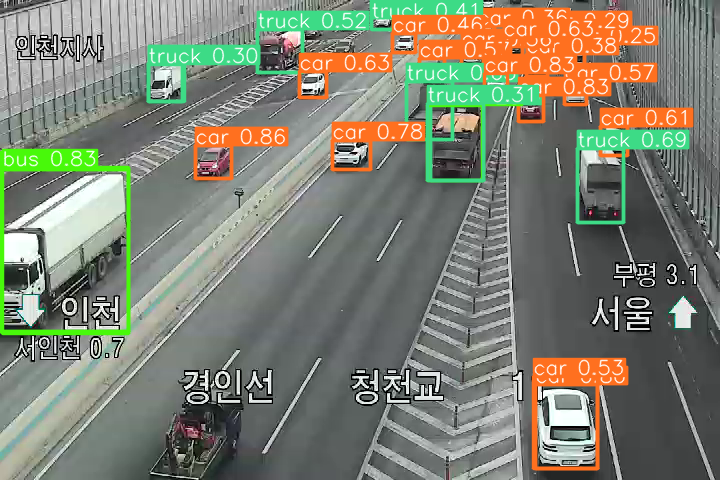

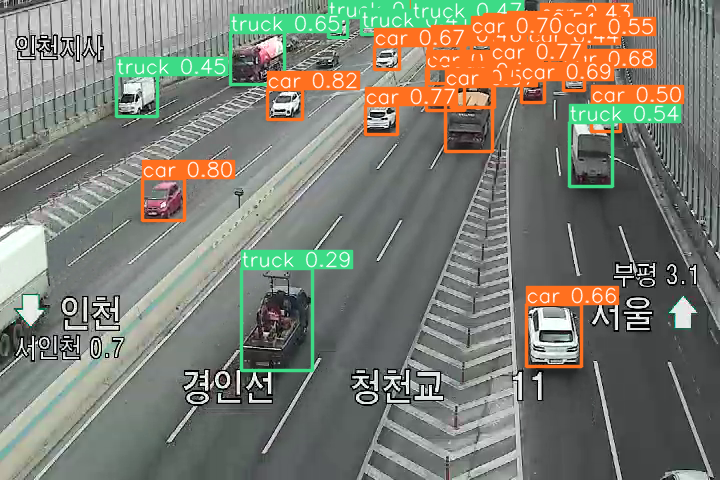

In [ ]:
results = model([im, im1], size=640) 
results.show()